In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from data_processing import *
import numpy as np
import scipy.stats as stats
from scipy.stats import skew

warnings.simplefilter("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set(style="darkgrid")

In [2]:
data = pd.read_csv("./train.csv")
data = data.drop(columns=["Id"])

y = np.log1p(data["SalePrice"])
X = data.drop(columns=["SalePrice"])

In [4]:
num_candidates = list(X.dtypes[X.dtypes!="object"].index.values)
dist_cols = ["LotFrontage", "TotalBsmtSF", "1stFlrSF", "GrLivArea"]

In [21]:
col = dist_cols[1]
data = X[X[col].notnull()][col]
params = stats.johnsonsu.fit(data)
params

(-0.5917807651696058, 1.3919373143299762, 821.445958359539, 423.0770523904433)

In [22]:
r = stats.johnsonsu.rvs(params[0], params[1], params[2], params[3], size=10000)

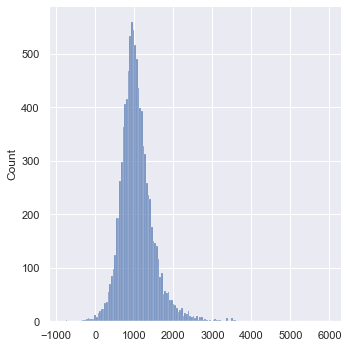

<Figure size 432x288 with 0 Axes>

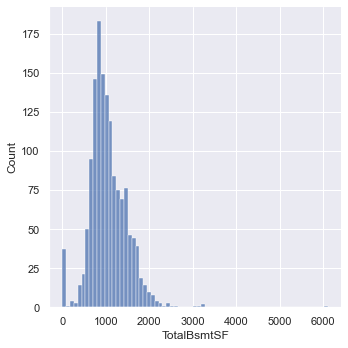

In [23]:
sns.displot(r)
plt.figure()
sns.displot(data)